# Entregable 1
## Inteligencia Artificial

En este entregable se realizará la aplicación de Análisis Exploratorio de Datos (EDA), y los clasificadores K vecinos más cercanos (k-NN) y árboles de decisión.

Para la solución deben escoger algún conjunto de datos para **clasificación** de kaggle (https://www.kaggle.com/datasets) o UCI (https://archive.ics.uci.edu/). 

Con los datos seleccionados hacer lo siguiente:

1. Realizar un Análisis Exploratorio de Datos del conjunto de datos seleccionado. En este paso indicar qué se hace y para qué, es decir, realizar un análisis consciente de lo que se está realizando y con qué fin.

2. Realizar una división del conjunto de datos en entrenamiento (train) y prueba (test), la proporción de división es libre.

3. Con el conjunto de datos depurado realizar el entrenamiento de un modelo de k-NN. Encontrar el valor de k óptimo para la solución del problema con el conjunto de prueba.

4. Finalmente, realizar el entrenamiento de un clasificador de árbol de decisión. Realizar la evaluación de este clasificador para diferentes hiperparámetros, buscando encontrar los mejores para el conjunto de prueba.

In [1]:
#celda para importar, pueden agregar las que requieran

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D

np.random.seed(seed=10)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (4,4)

## Solución a punto 1.

In [2]:
df = pd.read_csv('chip_dataset.csv',index_col=0)
print(df.shape)
df

(4854, 13)


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 64 3500+,CPU,2007-02-20,65.0,45.0,77.0,122.0,2200.0,Unknown,AMD,NaN,NaN,NaN
1,AMD Athlon 200GE,CPU,2018-09-06,14.0,35.0,192.0,4800.0,3200.0,Unknown,AMD,NaN,NaN,NaN
2,Intel Core i5-1145G7,CPU,2020-09-02,10.0,28.0,NaN,NaN,2600.0,Intel,Intel,NaN,NaN,NaN
3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22.0,80.0,160.0,1400.0,1800.0,Intel,Intel,NaN,NaN,NaN
4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45.0,125.0,258.0,758.0,3700.0,Unknown,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4849,NVIDIA Quadro 3000M,GPU,2011-02-22,40.0,75.0,332.0,1950.0,450.0,TSMC,NVIDIA,NaN,432.0,36.0
4850,Intel GMA 950,GPU,2005-06-01,90.0,7.0,NaN,NaN,250.0,Intel,Intel,NaN,NaN,NaN
4851,NVIDIA GeForce GT 320M,GPU,2010-03-03,40.0,23.0,100.0,486.0,500.0,TSMC,NVIDIA,NaN,52.8,NaN
4852,NVIDIA GeForce FX 5200,GPU,2003-03-06,150.0,NaN,65.0,29.0,250.0,TSMC,NVIDIA,NaN,NaN,NaN


In [3]:
df.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (MHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4854 entries, 0 to 4853
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4854 non-null   object 
 1   Type                   4854 non-null   object 
 2   Release Date           4854 non-null   object 
 3   Process Size (nm)      4845 non-null   float64
 4   TDP (W)                4228 non-null   float64
 5   Die Size (mm^2)        4139 non-null   float64
 6   Transistors (million)  4143 non-null   float64
 7   Freq (MHz)             4854 non-null   float64
 8   Foundry                4854 non-null   object 
 9   Vendor                 4854 non-null   object 
 10  FP16 GFLOPS            536 non-null    float64
 11  FP32 GFLOPS            1948 non-null   float64
 12  FP64 GFLOPS            1306 non-null   float64
dtypes: float64(8), object(5)
memory usage: 530.9+ KB


In [5]:
num_nan = df.isna().sum()
# print(num_nan.to_string())
print(num_nan[num_nan != 0])

Process Size (nm)           9
TDP (W)                   626
Die Size (mm^2)           715
Transistors (million)     711
FP16 GFLOPS              4318
FP32 GFLOPS              2906
FP64 GFLOPS              3548
dtype: int64


In [6]:
df[num_nan[num_nan != 0].index].isna()

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,False,False,False,False,True,True,True
1,False,False,False,False,True,True,True
2,False,False,True,True,True,True,True
3,False,False,False,False,True,True,True
4,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...
4849,False,False,False,False,True,False,False
4850,False,False,True,True,True,True,True
4851,False,False,False,False,True,False,True
4852,False,True,False,False,True,True,True


In [7]:
df = df.dropna(subset=num_nan[num_nan != 0].index, how='any')
df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2194,NVIDIA GeForce MX150 GP107,GPU,2019-02-23,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,18.38,1177.0,36.770
2204,AMD Radeon RX 6800,GPU,2020-10-28,7.0,250.0,520.0,26800.0,1700.0,TSMC,AMD,32330.00,16170.0,1010.000
2211,NVIDIA Tesla V100 SXM2 32 GB,GPU,2018-03-27,12.0,250.0,815.0,21100.0,1290.0,TSMC,NVIDIA,31330.00,15670.0,7834.000
2217,AMD Radeon R7 Mobile Graphics,GPU,2015-11-15,28.0,15.0,125.0,1200.0,200.0,GF,AMD,737.30,737.3,368.600
2221,NVIDIA Jetson Nano GPU,GPU,NaT,20.0,10.0,118.0,2000.0,640.0,TSMC,NVIDIA,471.60,235.8,7.368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,AMD Radeon Pro 460,GPU,2016-10-30,14.0,35.0,123.0,3000.0,850.0,GF,AMD,1858.00,1858.0,116.100
4803,NVIDIA Quadro P1000,GPU,2017-02-07,14.0,47.0,132.0,3300.0,1354.0,Samsung,NVIDIA,22.27,1425.0,44.540
4830,AMD Radeon RX 550X Mobile,GPU,2018-04-11,14.0,50.0,103.0,2200.0,1100.0,GF,AMD,1505.00,1505.0,94.080
4836,AMD Radeon Instinct MI25,GPU,2017-06-27,14.0,300.0,495.0,12500.0,1400.0,GF,AMD,24580.00,12290.0,768.000


In [8]:
df.isnull().sum().max()

0

In [9]:
numerical_features_all = df.select_dtypes(include=np.number).columns
print('Columnas numéricas:',numerical_features_all)
df_num = df[numerical_features_all]

categorical_features_all = df.select_dtypes(include='object').columns
print('\nColumnas categóricas:',categorical_features_all)

Columnas numéricas: Index(['Process Size (nm)', 'TDP (W)', 'Die Size (mm^2)',
       'Transistors (million)', 'Freq (MHz)', 'FP16 GFLOPS', 'FP32 GFLOPS',
       'FP64 GFLOPS'],
      dtype='object')

Columnas categóricas: Index(['Product', 'Type', 'Release Date', 'Foundry', 'Vendor'], dtype='object')


In [10]:
for c in numerical_features_all:
    print(f'{c}: \t min:', df[c].min(), '\tmax:', df[c].max())

Process Size (nm): 	 min: 7.0 	max: 28.0
TDP (W): 	 min: 10.0 	max: 500.0
Die Size (mm^2): 	 min: 74.0 	max: 826.0
Transistors (million): 	 min: 1200.0 	max: 54200.0
Freq (MHz): 	 min: 200.0 	max: 2321.0
FP16 GFLOPS: 	 min: 10.02 	max: 184600.0
FP32 GFLOPS: 	 min: 153.6 	max: 40000.0
FP64 GFLOPS: 	 min: 7.368 	max: 11540.0


In [11]:
df['FP16 GFLOPS']

2194       18.38
2204    32330.00
2211    31330.00
2217      737.30
2221      471.60
          ...   
4802     1858.00
4803       22.27
4830     1505.00
4836    24580.00
4840    11980.00
Name: FP16 GFLOPS, Length: 428, dtype: float64

In [12]:
df['Transistors (million)']


2194     3300.0
2204    26800.0
2211    21100.0
2217     1200.0
2221     2000.0
         ...   
4802     3000.0
4803     3300.0
4830     2200.0
4836    12500.0
4840    10800.0
Name: Transistors (million), Length: 428, dtype: float64

<AxesSubplot: >

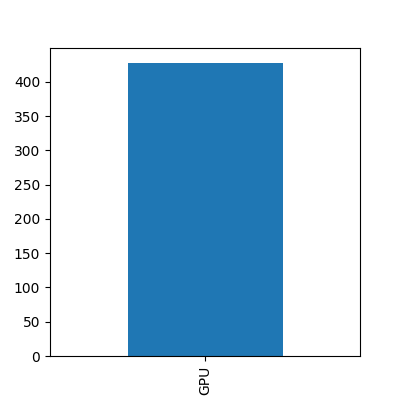

In [13]:
df['Type'].value_counts().plot.bar()


## Solución a punto 3.

3. Con el conjunto de datos depurado realizar el entrenamiento de un modelo de k-NN. Encontrar el valor de k óptimo para la solución del problema con el conjunto de prueba.

In [14]:
def funDistancia(X,x_new):
    return np.sqrt(np.sum((X-x_new)**2,axis=1))

In [15]:
from scipy import stats

def IAW_knn(X,y,K,Xnew):
    distancia = funDistancia(X,Xnew)
    I = np.argsort(distancia)
    Ke = y[I[:K]]
    #print(Ke)
    
    return stats.mode(Ke).mode

In [16]:
import ipywidgets as widgets
slider = widgets.IntSlider(
    min=1,
    max=395,
    step=2,
    description='Slider:',
    value=100,
    continuous_update=False)

In [17]:
def graficarFrontera(K):  
    K = K['new']
    print(f"Valor de K:{K}")
    xrange = [-3, 6]
    yrange = xrange
    reso = 200

    [XX,YY] = np.meshgrid(np.linspace(xrange[0],xrange[1],reso),np.linspace(yrange[0],yrange[1],reso))
    xy = np.vstack((YY.flatten(),XX.flatten()))
    xy = xy.T

#     K = 1

    b = np.zeros(xy.shape[0])
    for i in range(xy.shape[0]):
        #IAW_knn(X,y,1,xy[i,:])
        b[i] = IAW_knn(X,y,K,xy[i,:])[0]

    dm = np.reshape(b,(reso,reso),order='F')
    
#     try:
#         fig.clf()
#     except:
#         fig = plt.figure(figsize=(4, 4))
#     ax = fig.add_subplot(111)
#     ax.cla()
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111)

    ax.set_title(f"Frontera de decisión para {K} vecino(s)")
    ax.scatter(X[:,0],X[:,1],s=50,c=y.squeeze(),cmap='jet')
    ax.imshow(dm, extent=[xrange[0], xrange[1], yrange[0], yrange[1]],alpha=0.4,origin='lower')

NameError: name 'X' is not defined

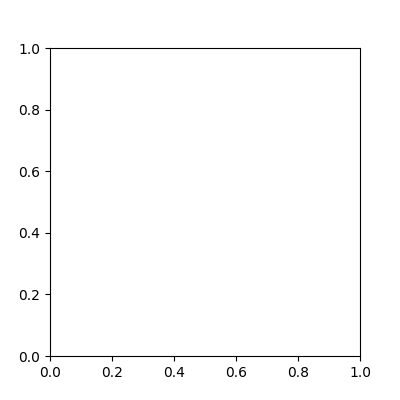

In [18]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.scatter(X[:],X[:,0],s=50,c=y.squeeze(),cmap='jet')
plt.show()

In [19]:
display(slider)
slider.observe(graficarFrontera, names='value')

IntSlider(value=100, continuous_update=False, description='Slider:', max=395, min=1, step=2)

## Solución a punto 4.

Finalmente, realizar el entrenamiento de un clasificador de árbol de decisión. Realizar la evaluación de este clasificador para diferentes hiperparámetros, buscando encontrar los mejores para el conjunto de prueba.

In [20]:
df.head()

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2194,NVIDIA GeForce MX150 GP107,GPU,2019-02-23,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,18.38,1177.0,36.770
2204,AMD Radeon RX 6800,GPU,2020-10-28,7.0,250.0,520.0,26800.0,1700.0,TSMC,AMD,32330.00,16170.0,1010.000
2211,NVIDIA Tesla V100 SXM2 32 GB,GPU,2018-03-27,12.0,250.0,815.0,21100.0,1290.0,TSMC,NVIDIA,31330.00,15670.0,7834.000
2217,AMD Radeon R7 Mobile Graphics,GPU,2015-11-15,28.0,15.0,125.0,1200.0,200.0,GF,AMD,737.30,737.3,368.600
2221,NVIDIA Jetson Nano GPU,GPU,NaT,20.0,10.0,118.0,2000.0,640.0,TSMC,NVIDIA,471.60,235.8,7.368


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 2194 to 4840
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                428 non-null    object 
 1   Type                   428 non-null    object 
 2   Release Date           428 non-null    object 
 3   Process Size (nm)      428 non-null    float64
 4   TDP (W)                428 non-null    float64
 5   Die Size (mm^2)        428 non-null    float64
 6   Transistors (million)  428 non-null    float64
 7   Freq (MHz)             428 non-null    float64
 8   Foundry                428 non-null    object 
 9   Vendor                 428 non-null    object 
 10  FP16 GFLOPS            428 non-null    float64
 11  FP32 GFLOPS            428 non-null    float64
 12  FP64 GFLOPS            428 non-null    float64
dtypes: float64(8), object(5)
memory usage: 46.8+ KB


In [22]:
df = df.drop(['Product', 'Release Date'], axis=1)

In [23]:
df

,Type,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
2194,GPU,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,18.38,1177.0,36.770
2204,GPU,7.0,250.0,520.0,26800.0,1700.0,TSMC,AMD,32330.00,16170.0,1010.000
2211,GPU,12.0,250.0,815.0,21100.0,1290.0,TSMC,NVIDIA,31330.00,15670.0,7834.000
2217,GPU,28.0,15.0,125.0,1200.0,200.0,GF,AMD,737.30,737.3,368.600
2221,GPU,20.0,10.0,118.0,2000.0,640.0,TSMC,NVIDIA,471.60,235.8,7.368
...,...,...,...,...,...,...,...,...,...,...,...
4802,GPU,14.0,35.0,123.0,3000.0,850.0,GF,AMD,1858.00,1858.0,116.100
4803,GPU,14.0,47.0,132.0,3300.0,1354.0,Samsung,NVIDIA,22.27,1425.0,44.540
4830,GPU,14.0,50.0,103.0,2200.0,1100.0,GF,AMD,1505.00,1505.0,94.080
4836,GPU,14.0,300.0,495.0,12500.0,1400.0,GF,AMD,24580.00,12290.0,768.000


In [24]:
df = pd.get_dummies(df, columns=['Type'], dtype=int,  drop_first=False)
df

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Type_GPU
2194,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,18.38,1177.0,36.770,1
2204,7.0,250.0,520.0,26800.0,1700.0,TSMC,AMD,32330.00,16170.0,1010.000,1
2211,12.0,250.0,815.0,21100.0,1290.0,TSMC,NVIDIA,31330.00,15670.0,7834.000,1
2217,28.0,15.0,125.0,1200.0,200.0,GF,AMD,737.30,737.3,368.600,1
2221,20.0,10.0,118.0,2000.0,640.0,TSMC,NVIDIA,471.60,235.8,7.368,1
...,...,...,...,...,...,...,...,...,...,...,...
4802,14.0,35.0,123.0,3000.0,850.0,GF,AMD,1858.00,1858.0,116.100,1
4803,14.0,47.0,132.0,3300.0,1354.0,Samsung,NVIDIA,22.27,1425.0,44.540,1
4830,14.0,50.0,103.0,2200.0,1100.0,GF,AMD,1505.00,1505.0,94.080,1
4836,14.0,300.0,495.0,12500.0,1400.0,GF,AMD,24580.00,12290.0,768.000,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 2194 to 4840
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Process Size (nm)      428 non-null    float64
 1   TDP (W)                428 non-null    float64
 2   Die Size (mm^2)        428 non-null    float64
 3   Transistors (million)  428 non-null    float64
 4   Freq (MHz)             428 non-null    float64
 5   Foundry                428 non-null    object 
 6   Vendor                 428 non-null    object 
 7   FP16 GFLOPS            428 non-null    float64
 8   FP32 GFLOPS            428 non-null    float64
 9   FP64 GFLOPS            428 non-null    float64
 10  Type_GPU               428 non-null    int32  
dtypes: float64(8), int32(1), object(2)
memory usage: 38.5+ KB


In [26]:
df.rename(columns={"Type_GPU": "Type"}, inplace=True)

In [27]:
df

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Type
2194,14.0,25.0,132.0,3300.0,1469.0,Samsung,NVIDIA,18.38,1177.0,36.770,1
2204,7.0,250.0,520.0,26800.0,1700.0,TSMC,AMD,32330.00,16170.0,1010.000,1
2211,12.0,250.0,815.0,21100.0,1290.0,TSMC,NVIDIA,31330.00,15670.0,7834.000,1
2217,28.0,15.0,125.0,1200.0,200.0,GF,AMD,737.30,737.3,368.600,1
2221,20.0,10.0,118.0,2000.0,640.0,TSMC,NVIDIA,471.60,235.8,7.368,1
...,...,...,...,...,...,...,...,...,...,...,...
4802,14.0,35.0,123.0,3000.0,850.0,GF,AMD,1858.00,1858.0,116.100,1
4803,14.0,47.0,132.0,3300.0,1354.0,Samsung,NVIDIA,22.27,1425.0,44.540,1
4830,14.0,50.0,103.0,2200.0,1100.0,GF,AMD,1505.00,1505.0,94.080,1
4836,14.0,300.0,495.0,12500.0,1400.0,GF,AMD,24580.00,12290.0,768.000,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 2194 to 4840
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Process Size (nm)      428 non-null    float64
 1   TDP (W)                428 non-null    float64
 2   Die Size (mm^2)        428 non-null    float64
 3   Transistors (million)  428 non-null    float64
 4   Freq (MHz)             428 non-null    float64
 5   Foundry                428 non-null    object 
 6   Vendor                 428 non-null    object 
 7   FP16 GFLOPS            428 non-null    float64
 8   FP32 GFLOPS            428 non-null    float64
 9   FP64 GFLOPS            428 non-null    float64
 10  Type                   428 non-null    int32  
dtypes: float64(8), int32(1), object(2)
memory usage: 38.5+ KB


In [32]:
df = pd.get_dummies(df, columns=['Foundry', 'Vendor'], dtype=int,  drop_first=False)

In [33]:
df

,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (MHz),FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS,Type,Foundry_GF,Foundry_Intel,Foundry_Samsung,Foundry_TSMC,Vendor_AMD,Vendor_Intel,Vendor_NVIDIA
2194,14.0,25.0,132.0,3300.0,1469.0,18.38,1177.0,36.770,1,0,0,1,0,0,0,1
2204,7.0,250.0,520.0,26800.0,1700.0,32330.00,16170.0,1010.000,1,0,0,0,1,1,0,0
2211,12.0,250.0,815.0,21100.0,1290.0,31330.00,15670.0,7834.000,1,0,0,0,1,0,0,1
2217,28.0,15.0,125.0,1200.0,200.0,737.30,737.3,368.600,1,1,0,0,0,1,0,0
2221,20.0,10.0,118.0,2000.0,640.0,471.60,235.8,7.368,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4802,14.0,35.0,123.0,3000.0,850.0,1858.00,1858.0,116.100,1,1,0,0,0,1,0,0
4803,14.0,47.0,132.0,3300.0,1354.0,22.27,1425.0,44.540,1,0,0,1,0,0,0,1
4830,14.0,50.0,103.0,2200.0,1100.0,1505.00,1505.0,94.080,1,1,0,0,0,1,0,0
4836,14.0,300.0,495.0,12500.0,1400.0,24580.00,12290.0,768.000,1,1,0,0,0,1,0,0


## Solución a punto 2.

2. Realizar una división del conjunto de datos en entrenamiento (train) y prueba (test), la proporción de división es libre.

In [34]:
X = df.drop('Type', axis = 1)
y = df.Type

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [38]:
# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4)

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}
#clf.fit(X_train, y_train)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)  # Ajustar el modelo con los datos de entrenamiento

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)


Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 2}
Mejor puntuación de validación cruzada:
1.0


In [39]:
best_clf = grid_search.best_estimator_

In [40]:
print(best_clf)

DecisionTreeClassifier(max_depth=2, random_state=42)


In [42]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred))

El accuracy en train es: 1.0
El accuracy en test es: 1.0


In [46]:
best_clf.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

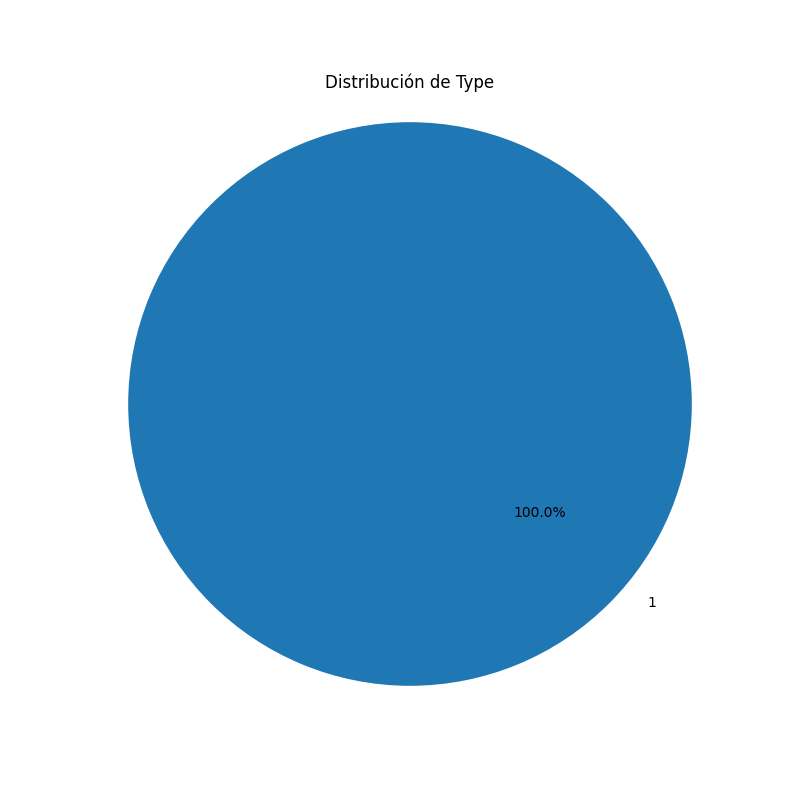

In [49]:
# 2. Selecciona la columna que deseas visualizar
columna = 'Type'

# 3. Calcula la frecuencia de cada valor en esa columna
frecuencia_valores = df[columna].value_counts()

# 4. Crea el diagrama de torta
plt.figure(figsize=(8, 8))  # Tamaño opcional del diagrama de torta
plt.pie(frecuencia_valores, labels=frecuencia_valores.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Proporciona una forma circular en lugar de elíptica
plt.title('Distribución de {}'.format(columna))  # Título del diagrama de torta
plt.show()